In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
train = pd.read_csv('/content/secondary_data.csv', delimiter=';')

In [7]:
train.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [8]:
train.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [9]:
train.describe(include=['O'])

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,61069,61069,46949,61069,61069,51185,36006,61069,9531,22945,61069,3177,7413,61069,58598,6354,61069,61069
unique,2,7,11,12,2,7,3,12,5,8,13,1,6,2,8,7,8,4
top,p,x,t,n,f,a,c,w,s,s,w,u,w,f,f,k,d,a
freq,33888,26934,8196,24218,50479,12698,24710,18521,3177,6025,22926,3177,5474,45890,48361,2118,44209,30177


In [10]:
print(train.columns)

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')


In [13]:
train['class'] = pd.factorize(train['class'])[ 0 ] # замена p(poisonous) на 0 e(edibile) на 1

In [14]:
train.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,0,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,0,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,0,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,0,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


<Axes: xlabel='class', ylabel='count'>

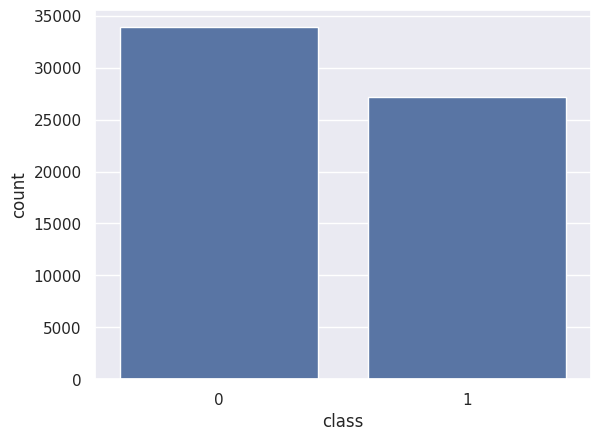

In [21]:
sns.countplot(x=train["class"])

In [29]:
train['class'].value_counts()

,count
class,
0,33888
1,27181


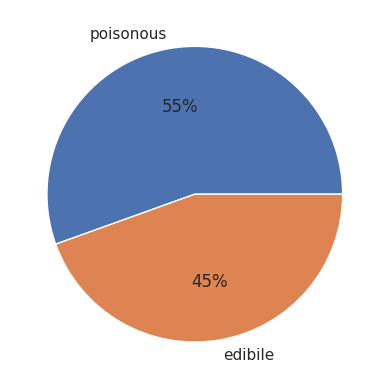

In [30]:
data = [33888, 	27181]
labels = ['poisonous', 'edibile']

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

<Axes: xlabel='cap-color', ylabel='count'>

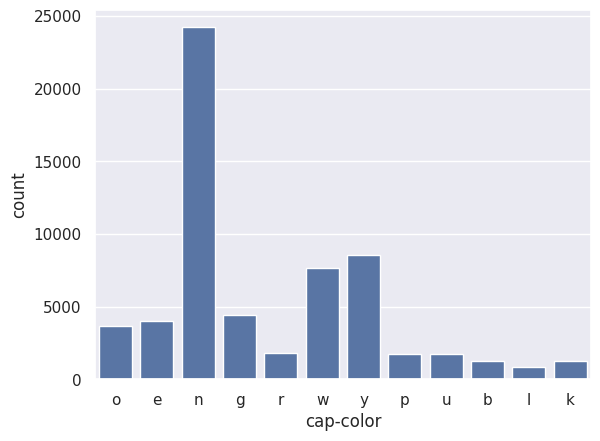

In [32]:
sns.countplot(x=train["cap-color"])# brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k

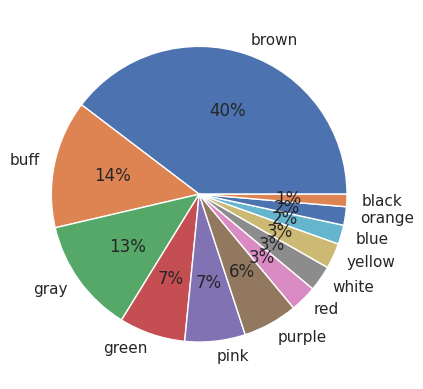

In [38]:
labels = ['brown', 'buff',"gray","green","pink","purple","red","white","yellow","blue","orange","black"]

plt.pie(train['cap-color'].value_counts().tolist(), labels = labels, autopct='%.0f%%')
plt.show()

<Axes: xlabel='class', ylabel='count'>

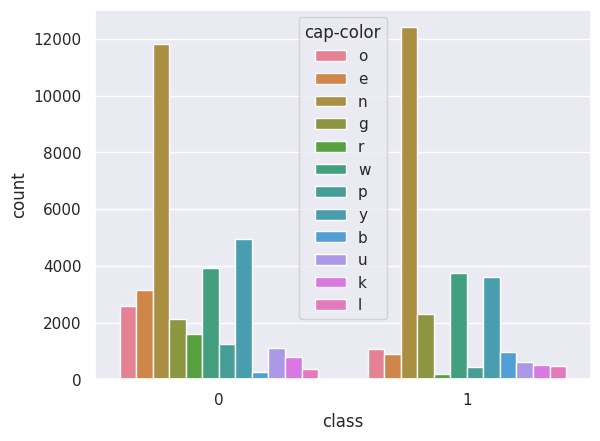

In [39]:
sns.countplot(data=train, x="class", hue='cap-color')

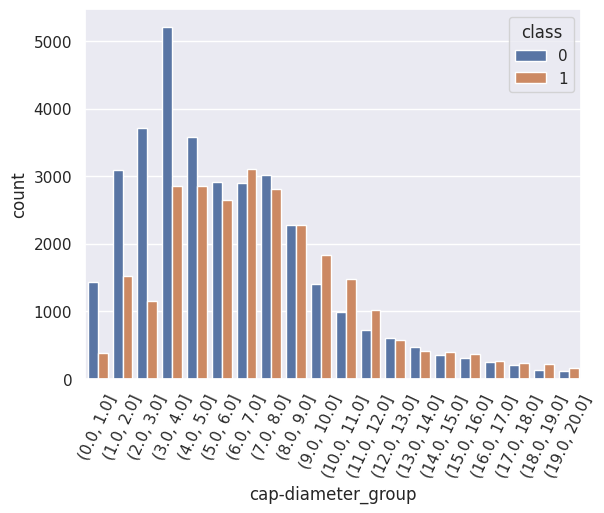

In [52]:
train["cap-diameter_group"] = pd.cut(x=train['cap-diameter'], bins=[0.00, 1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 7.00, 8.00, 9.00, 10.00, 11.00, 12.00, 13.00, 14.00, 15.00, 16.00, 17.00, 18.00, 19.00, 20.00])
plt.xticks(rotation=65)
sns.countplot(data=train, hue='class', x='cap-diameter_group');

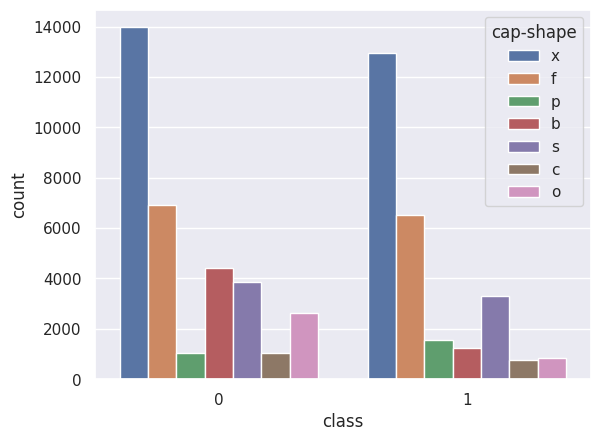

In [53]:
sns.countplot(data=train, x="class", hue='cap-shape');# bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o